# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


# Load Data

mengubah Csv menjadi dataframe dengan Pandas

Menampilkan 5 data teratas dari dataframe

In [2]:
df_bankAdit = pd.read_csv('bankAdititonal.csv', sep=';')
df_bankAdit

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df_bankAdit.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Menampilkan 5 data terakhir dari dataframe

In [4]:
df_bankAdit.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


Menampilkan jumlah baris dan kolom

In [5]:
df_bankAdit.shape

(41188, 21)

Menampilkan ringkasan/deskripsi dataframe

In [6]:
df_bankAdit.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Melihat informasi dataframe

In [7]:
df_bankAdit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Menghitung jumlah missing values dari dataframe

In [8]:
df_bankAdit.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Mengecek data yang ter-duplikat

In [9]:
df_bankAdit.duplicated().sum()

12


# DATA CLEANING

Menghapus dan menghitung jumlah baris  data duplikat dalam dataframe

In [10]:
df_bankAdit.drop_duplicates(inplace=True)
df_bankAdit.duplicated().sum()

0

mendapatkan daftar kolom,
loop melalui setiap kolom, dan
menampilkan nilai unik setiap kolom

In [11]:
kolom_datasheet = df_bankAdit.columns
for kolom in kolom_datasheet:
   
    unique_values = df_bankAdit[kolom].sort_values().unique()
    print(f"Kolom: {kolom}")
    print(unique_values)
    print("\n")

Kolom: age
[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 91 92 94 95 98]


Kolom: job
['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']


Kolom: marital
['divorced' 'married' 'single' 'unknown']


Kolom: education
['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']


Kolom: default
['no' 'unknown' 'yes']


Kolom: housing
['no' 'unknown' 'yes']


Kolom: loan
['no' 'unknown' 'yes']


Kolom: contact
['cellular' 'telephone']


Kolom: month
['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']


Kolom: day_of_week
['fri' 'mon' 'thu' 'tue' 'wed']


Kolom: duration
[   0    1    2 ... 3785 4199 4918]


Kolom: campaign
[ 1  2  3  4  5  6  7  8  9 10 11 

menghitung jumlah data uknown setiap kolom dan menampilkan hasil perhitungan

In [12]:
unknown_counts = df_bankAdit.eq('unknown').sum()
print(unknown_counts)

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


Ubah nilai unknown menjadi nilai NaN dan mengetahui jumlah data null

In [13]:
df_bankAdit.replace('unknown', np.nan, inplace=True)

print(df_bankAdit.isnull().sum())

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


Mengahapus baris dengan Nilai Nan dan menampilkan jumlah data null

In [14]:
df_bankAdit = df_bankAdit.dropna()

null_counts_after = df_bankAdit.isnull().sum()

print(null_counts_after)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


Menentukan kolom dan melakukan label encoding serta menampilkan hasilnya



In [15]:

categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


label_encoder = LabelEncoder()
for col in categorical_cols:
    df_bankAdit[col] = label_encoder.fit_transform(df_bankAdit[col])


df_bankAdit.head()

C:\Users\acer\AppData\Local\Temp\ipykernel_22644\4097181833.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bankAdit[col] = label_encoder.fit_transform(df_bankAdit[col])
C:\Users\acer\AppData\Local\Temp\ipykernel_22644\4097181833.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bankAdit[col] = label_encoder.fit_transform(df_bankAdit[col])
C:\Users\acer\AppData\Local\Temp\ipykernel_22644\4097181833.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


# CHART

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


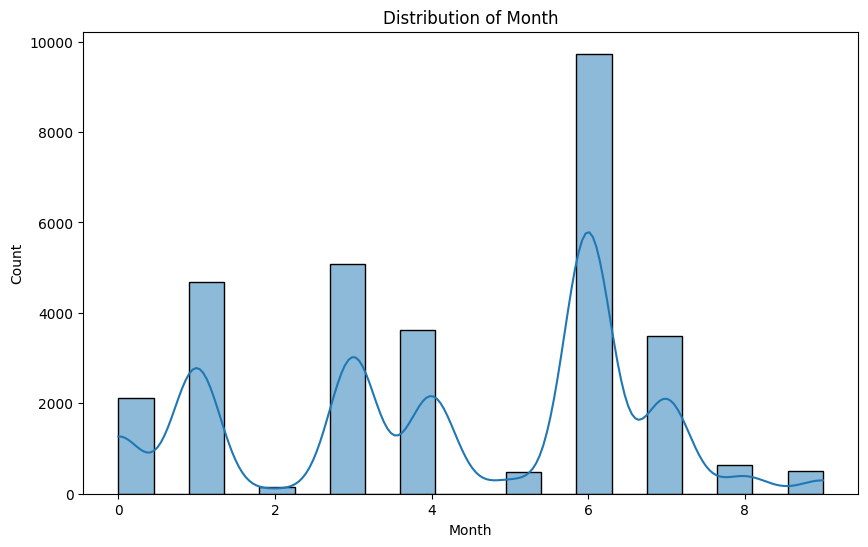

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_bankAdit, x='month', bins=20, kde=True)
plt.title('Distribution of Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

pada plot diatas nilai terbanyak pada kolom month terdapat di bulan ke-6

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

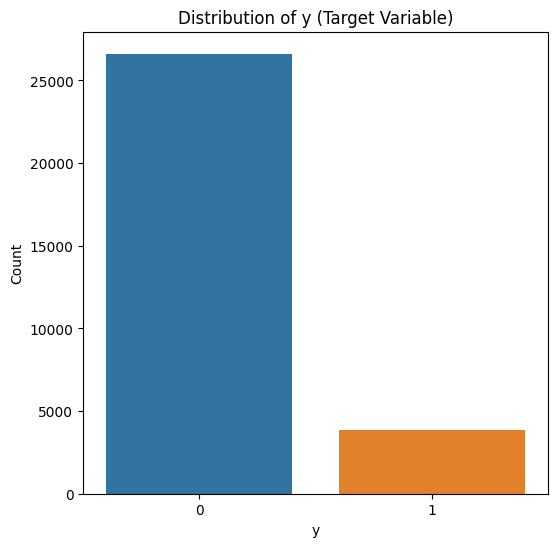

In [17]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df_bankAdit, x='y')
plt.title('Distribution of y (Target Variable)')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()

pada plot diatas terdapat nilai no lebih banyak dibanding nilai yes pada kolom y

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


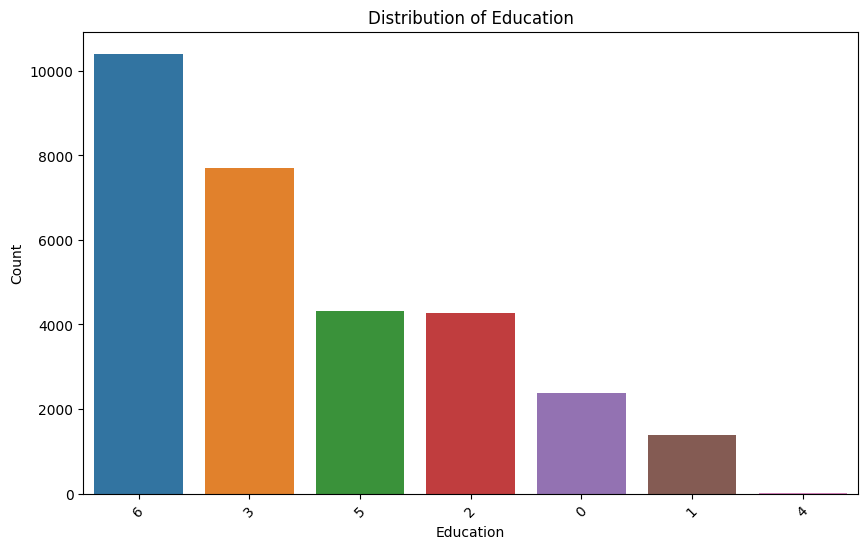

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_bankAdit, x='education', order=df_bankAdit['education'].value_counts().index)
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

pada plot diatas terdapat paling banyak university.degree dan terendah basic.6y pada kolom education

# LOGIC REGRESSION

In [19]:
features = ['age', 'duration']
     

memisahkan x(target) dan y(fitur)

In [20]:
X = df_bankAdit[features]
y = df_bankAdit['y']
     

penanganan ketidakseimbangan kelas

In [21]:
smote = SMOTE(random_state=42)
X,y = smote.fit_resample(X,y)

membagi data menjadi data latih dan uji

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scale data

In [23]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
model_logreg = LogisticRegression()

model_logreg.fit(X_train, y_train)
     

LogisticRegression()

In [25]:
y_pred = model_logreg.predict(X_test)
     

In [26]:
from sklearn.metrics import accuracy_score

print('Accuracy : ', accuracy_score(y_test, y_pred))

Accuracy :  0.7238918106686701


Evaluasi Model

In [27]:
#mendapat akurasi 
model_logreg.score(X_train, y_train)

0.7116359879789632

In [28]:
# mendapat confusion matrix()
confusion_matrix(y_test, y_pred)

array([[4359,  954],
       [1986, 3349]], dtype=int64)

In [29]:
#mendapat laporan klasifikasi (string/dictionary)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75      5313
           1       0.78      0.63      0.69      5335

    accuracy                           0.72     10648
   macro avg       0.73      0.72      0.72     10648
weighted avg       0.73      0.72      0.72     10648



----------
Presisi (precision)

1. Untuk kelas 0 (no): Model memiliki presisi sekitar 0.69, yang berarti sekitar 69% dari prediksi kelas 0 benar (true negatives), sementara sisanya adalah false positives. Ini mengindikasikan model memiliki kemampuan yang cukup baik untuk mengidentifikasi kelas 0, tetapi masih ada beberapa false positives.
2. Untuk kelas 1 (yes): Model memiliki presisi sekitar 0.78, yang berarti sekitar 78% dari prediksi kelas 1 benar (true positives), sementara sisanya adalah false negatives. Ini mengindikasikan model memiliki kemampuan yang baik untuk mengidentifikasi kelas 1.

----------
Recall


1. Untuk kelas 0 (no): Model memiliki recall sekitar 0.82, yang berarti sekitar 82% dari total kelas 0 yang sebenarnya telah diidentifikasi dengan benar. Ini adalah indikasi baik tentang kemampuan model dalam mengidentifikasi kelas 0.
2. Untuk kelas 1 (yes): Model memiliki recall sekitar 0.63, yang berarti sekitar 63% dari total kelas 1 yang sebenarnya telah diidentifikasi dengan benar. Recall yang lebih rendah untuk kelas 1 mungkin mengindikasikan beberapa contoh positif yang tidak diidentifikasi oleh model.


----------
 f-1 score

1. F1-score adalah rata-rata harmonik antara precision dan recall. Untuk keseluruhan model, F1-score sekitar 0.72, yang menunjukkan seimbang antara precision dan recall.
2. F1-score yang baik untuk dataset yang tidak seimbang.


----------
 AKurasi

Akurasi keseluruhan model sekitar 0.72, yang menunjukkan sekitar 72% dari prediksi benar secara keseluruhan. Ini adalah metrik yang memberikan gambaran umum tentang performa model, tetapi bisa menjadi bias dalam kasus ketidakseimbangan kelas.

----------


# K-Nearest Neighbor (KKN)

In [30]:
features = ['age','campaign']

memisahkan fitur x dan target y

In [31]:
X = df_bankAdit[features]
y = df_bankAdit['y']
     

Penanganan Ketidakseimbangan kelas

In [32]:
smote = SMOTE(random_state=42)
X,y = smote.fit_resample(X,y)

membagi data latih dan data uji

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

GENERATING MODEL FOR K=5

Mari kita buat model pengklasifikasi KNN untuk k = 5.

create KKN clasifier,train model menggunakan training sets,predik respon tes dataset

In [34]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

MODEL EVALUATION FOR K=5

memperkirakan, seberapa akurat pengklasifikasi atau model dapat memprediksi jenis kultivar.

Akurasi dapat dihitung dengan membandingkan actual test set values dan predicted values.


import library scikit-learn metrik modul untuk mengkalkulasi akurasi dan seberapa sering pengklasifikasi akurasi model benar?

In [35]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5574755822689706


REGENERATING MODEL FOR K=7

 buat model pengklasifikasi KNN untuk k = 7.

Import Library knearest neighbors Classifier model, membuat KNN classifier,latih model menggunakan sets,predik respon untuk kumpulan pengujian datashet

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mengecek estimasi seberapa akurat pengklasifikasi atau model dapat memprediksi jenis kultivar untuk k = 7.



In [37]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5646130728775357


Mendapat confusion matrix dengan confusion_matrix()

In [38]:
confusion_matrix(y_test, y_pred)

array([[3123, 2190],
       [2446, 2889]], dtype=int64)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.59      0.57      5313
           1       0.57      0.54      0.55      5335

    accuracy                           0.56     10648
   macro avg       0.56      0.56      0.56     10648
weighted avg       0.56      0.56      0.56     10648



----------
Presisi (precision)

Untuk kelas 0 (no): Model memiliki presisi sekitar 0.56, yang berarti sekitar 56% dari prediksi kelas 0 adalah benar (true negatives), sedangkan sisanya adalah false positives. Ini mengindikasikan model memiliki kemampuan yang cukup baik untuk mengidentifikasi kelas 0, tetapi masih ada beberapa false positives.
Untuk kelas 1 (yes): Model juga memiliki presisi sekitar 0.57, yang berarti sekitar 57% dari prediksi kelas 1 adalah benar (true positives), sedangkan sisanya adalah false positives. Ini menunjukkan kemampuan model yang cukup baik untuk mengidentifikasi kelas 1.

----------
Recall

Untuk kelas 0 (no): Model memiliki recall sekitar 0.59, yang berarti sekitar 59% dari total kelas 0 yang sebenarnya telah diidentifikasi dengan benar. Ini adalah indikasi yang baik tentang kemampuan model dalam mengidentifikasi kelas 0.
Untuk kelas 1 (positif): Model memiliki recall sekitar 0.54, yang berarti sekitar 54% dari total kelas 1 yang sebenarnya telah diidentifikasi dengan benar. Recall yang lebih rendah untuk kelas 1 mungkin mengindikasikan beberapa contoh positif yang tidak diidentifikasi oleh model.

----------
F-1 Score

F1-score adalah rata-rata harmonik antara precision dan recall. Untuk keseluruhan model, F1-score sekitar 0.56, yang menunjukkan seimbang antara precision dan recall

----------
Akurasi (Accuracy)

Akurasi keseluruhan model sekitar 0.56, yang menunjukkan sekitar 56% dari prediksi benar secara keseluruhan. Ini adalah metrik yang memberikan gambaran umum tentang performa model.

----------
Di sini, kita telah meningkatkan jumlah tetangga dalam model dan akurasi meningkat. Tapi, ini tidak perlu untuk setiap kasus dimana peningkatan banyak tetangga meningkatkan akurasi. 

improve model dan mencari tahu nilai k yang optimal.

Calculating error for K values between 1 and 40

In [40]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
     

Text(0, 0.5, 'Error mean')

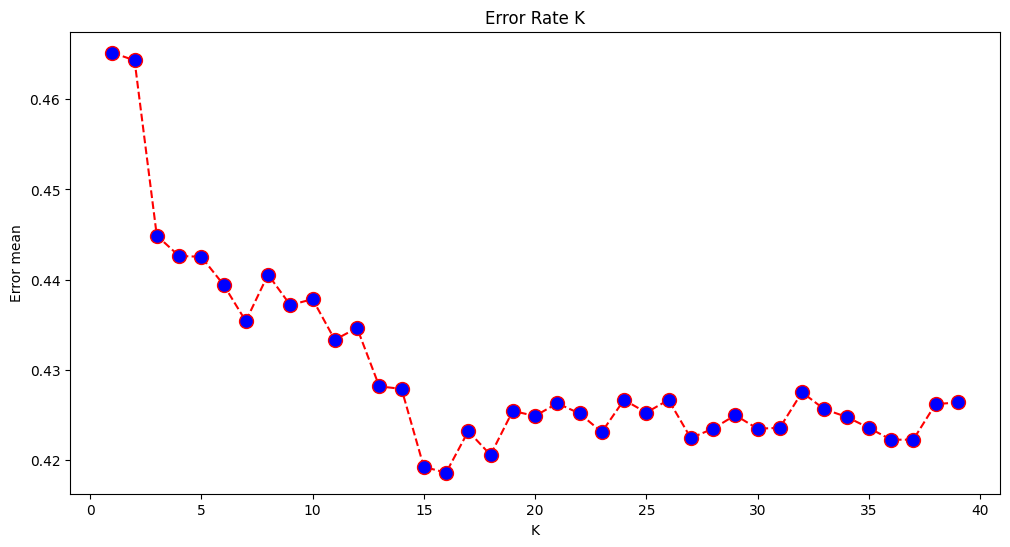

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')
     

In [42]:
error_rate_at_k2 = error[1]  # Indeks 1 karena indeks dimulai dari 0, sehingga K=2 memiliki indeks 1.
print(f"Error Rate at K=2: {error_rate_at_k2}")

Error Rate at K=2: 0.46431254695717505


Dari plot tersebut terlihat bahwa error terbesar didapatkan adalah 0.45877160030052594 pada K = 2.

# Support Vector Machine

In [43]:
features = ['age', 'month']

Memisahkan fitur (x) dan target (y)

In [44]:
X = df_bankAdit[features]
y = df_bankAdit['y']

penanganan ketidakimbangan kelas

In [45]:
smote = SMOTE(random_state=42)
X,y = smote.fit_resample(X,y)

membagi data menjadi data latih dan uji

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Generating model

In [47]:

from sklearn import svm

clf = svm.SVC(kernel='linear')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

Evaluasi Model

Akurasi dapat dihitung dengan membandingkan nilai set test aktual dan nilai prediksi.

In [48]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5424492862509391


In [49]:
#  mendapatkan confusion matrix dengan confusion_matrix():
confusion_matrix(y_test, y_pred)

array([[4445,  868],
       [4004, 1331]], dtype=int64)

In [50]:
#  mendapatkan laporan klasifikasi sebagai string atau dictionary dengan classification_report():
print(classification_report(y_test, y_pred))
     

              precision    recall  f1-score   support

           0       0.53      0.84      0.65      5313
           1       0.61      0.25      0.35      5335

    accuracy                           0.54     10648
   macro avg       0.57      0.54      0.50     10648
weighted avg       0.57      0.54      0.50     10648



----------



Presisi (precision)


-Untuk kelas 0 (no): Model memiliki presisi sekitar 0.53, yang berarti sekitar 53% dari prediksi kelas 0 adalah benar (true negatives), sementara sisanya adalah false positives. Ini mengindikasikan model memiliki kemampuan yang cukup baik dalam mengidentifikasi kelas 0.

-Untuk kelas 1 (yes): Model memiliki presisi sekitar 0.60, yang berarti sekitar 60% dari prediksi kelas 1 adalah benar (true positives), sementara sisanya adalah false positives. Ini menunjukkan kemampuan model yang lebih baik dalam mengidentifikasi kelas 1.

----------

Recall

-Untuk kelas 0 (no): Model memiliki recall sekitar 0.84, yang berarti sekitar 84% dari total kelas 0 yang sebenarnya telah diidentifikasi dengan benar. Ini adalah indikasi yang baik tentang kemampuan model dalam mengidentifikasi kelas 0.

-Untuk kelas 1 (yes): Model memiliki recall sekitar 0.25, yang berarti sekitar 25% dari total kelas 1 yang sebenarnya telah diidentifikasi dengan benar. Recall yang lebih rendah untuk kelas 1 mengindikasikan bahwa model kesulitan dalam mengidentifikasi ke

----------

F-1 Score

F1-score adalah rata-rata harmonik antara precision dan recall. Untuk keseluruhan model, F1-score sekitar 0.50, yang menunjukkan adanya trade-off antara precision dan recall.

----------

Akurasi (accuracy)

Akurasi keseluruhan model sekitar 0.54, yang menunjukkan sekitar 54% dari prediksi benar secara keseluruhan. Akurasi ini adalah akurasi keseluruhan model.

----------

Evaluasi lebih lanjut dengan memeriksa precision dan recall model

In [51]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred))

Precision: 0.605275125056844
Recall: 0.24948453608247423


Decision Tree

In [52]:
features = ['age', 'job']

In [53]:
# Memisahkan fitur (X) dan target (y)
X = df_bankAdit[features]
y = df_bankAdit['y']

In [54]:
# Penanganan Ketidakseimbangan Kelas
smote = SMOTE(random_state=42)
X,y = smote.fit_resample(X,y)

In [55]:

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# import tree model
from sklearn import tree

# create a tree model
dt = tree.DecisionTreeClassifier()

# Train the model using the training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [57]:
#Predict the response for test dataset
y_pred = dt.predict(X_test)

In [58]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6059353869271225


In [59]:
#  mendapatkan confusion matrix# Terakhir, kita bisa mendapatkan laporan klasifikasi sebagai string atau dictionary dengan classification_report():
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.65      0.62      5313
           1       0.62      0.56      0.59      5335

    accuracy                           0.61     10648
   macro avg       0.61      0.61      0.61     10648
weighted avg       0.61      0.61      0.61     10648



In [60]:
# T mendapatkan laporan klasifikasi sebagai string atau dictionary dengan classification_report():
print(classification_report(y_test, y_pred))
     

              precision    recall  f1-score   support

           0       0.60      0.65      0.62      5313
           1       0.62      0.56      0.59      5335

    accuracy                           0.61     10648
   macro avg       0.61      0.61      0.61     10648
weighted avg       0.61      0.61      0.61     10648



----------



Presisi (precision)

 kelas 0 (no): Model memiliki presisi sekitar 0.60, berarti sekitar 60% dari prediksi kelas 0 adalah benar (true negatives), sementara sisanya adalah false positives. Ini mengindikasikan model memiliki kemampuan yang cukup baik dalam mengidentifikasi kelas 0.

 kelas 1 (yes): Model  memiliki presisi sekitar 0.62,  berarti sekitar 62% dari prediksi kelas 1 adalah benar (true positives), sementara sisanya adalah false positives. Ini menunjukkan kemampuan model yang cukup baik dalam mengidentifikasi kelas 1.

----------


Recall

 kelas 0 (no): Model memiliki recall sekitar 0.65,  berarti sekitar 65% dari total kelas 0 yang sebenarnya telah diidentifikasi dengan benar. Ini adalah indikasi yang baik tentang kemampuan model dalam mengidentifikasi kelas 0.

 kelas 1 (yes): Model memiliki recall sekitar 0.56, berarti sekitar 56% dari total kelas 1 yang sebenarnya telah diidentifikasi dengan benar. Recall yang lebih rendah untuk kelas 1 mungkin mengindikasikan beberapa contoh positif yang tidak diidentifikasi oleh model.

----------


F1-Score

F1-score adalah rata-rata harmonik antara precision dan recall. Untuk keseluruhan model, F1-score sekitar 0.60, yang menunjukkan seimbang antara precision dan recall.

----------


Akurasi (Accuracy)

Akurasi keseluruhan model sekitar 0.60, yang menunjukkan sekitar 60% dari prediksi benar secara keseluruhan. Akurasi ini adalah akurasi keseluruhan model.

----------


Random Forest

In [61]:
features = ['age', 'education']

In [62]:
# Memisahkan fitur (X) dan target (y)
X = df_bankAdit[features]
y = df_bankAdit['y']
     

In [63]:
# Penanganan Ketidakseimbangan Kelas
smote = SMOTE(random_state=42)
X,y = smote.fit_resample(X,y)

In [64]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
     

In [65]:
# import RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# create a Random Forest model
rf=RandomForestClassifier()

# Train the model using the training sets
rf.fit(X_train,y_train)

RandomForestClassifier()

In [66]:
#Predict the response for test dataset
y_pred = rf.predict(X_test)
     

In [67]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
     

Accuracy: 0.5895003756574004


In [68]:
#  mendapatkan confusion matrix dengan confusion_matrix():
confusion_matrix(y_test, y_pred)
     

array([[3267, 2046],
       [2325, 3010]], dtype=int64)

In [69]:
#  mendapatkan confusion matrix dengan confusion_matrix():
confusion_matrix(y_test, y_pred)
     

array([[3267, 2046],
       [2325, 3010]], dtype=int64)

In [70]:
#  mendapatkan laporan klasifikasi sebagai string atau dictionary dengan classification_report():
print(classification_report(y_test, y_pred))
     

              precision    recall  f1-score   support

           0       0.58      0.61      0.60      5313
           1       0.60      0.56      0.58      5335

    accuracy                           0.59     10648
   macro avg       0.59      0.59      0.59     10648
weighted avg       0.59      0.59      0.59     10648



----------


Presisi (precision)

kelas 0 (no): Model memiliki presisi sekitar 0.58, yang berarti sekitar 59% dari prediksi kelas 0 adalah benar (true negatives), sedangkan sisanya adalah false positives. Ini mengindikasikan model memiliki kemampuan yang cukup baik dalam mengidentifikasi kelas 0.

kelas 1 (yes): Model juga memiliki presisi sekitar 0.60, yang berarti sekitar 60% dari prediksi kelas 1 adalah benar (true positives), sedangkan sisanya adalah false positives. Ini menunjukkan kemampuan model yang cukup baik dalam mengidentifikasi kelas 1.

----------


Recall

kelas 0 (no): Model memiliki recall sekitar 0.62, yang berarti sekitar 62% dari total kelas 0 yang sebenarnya telah diidentifikasi dengan benar. Ini adalah indikasi yang baik tentang kemampuan model dalam mengidentifikasi kelas kelas 1 (yes): Model memiliki recall sekitar 0.56, yang berarti sekitar 57% dari total kelas 1 yang sebenarnya telah diidentifikasi dengan benar. Recall yang lebih rendah untuk kelas 1 mengindikasikan bahwa model kesulitan dalam mengidentifikasi kelas 1.
F1-score:

----------


F1-Score

F1-score adalah rata-rata harmonik antara precision dan recall. Untuk keseluruhan model, F1-score sekitar 0.59, yang menunjukkan seimbang antara precision dan recall.

----------


Akurasi (Accuracy)

Akurasi keseluruhan model sekitar 0.59, yang menunjukkan sekitar 59% dari prediksi benar secara keseluruhan. Akurasi ini adalah akurasi keseluruhan model.

----------


Naive Bayes

In [71]:
features = ['age', 'day_of_week']
     

In [72]:
# Memisahkan fitur (X) dan target (y)
X = df_bankAdit[features]
y = df_bankAdit['y']

In [73]:
# Penanganan Ketidakseimbangan Kelas
smote = SMOTE(random_state=42)
X,y = smote.fit_resample(X,y)
     

In [74]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:

# create a naive bayes model
nb=GaussianNB()

# Train the model using the training sets
nb.fit(X_train,y_train)

GaussianNB()

In [76]:
y_pred = nb.predict(X_test)

In [77]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5540007513148009


In [78]:
# mendapatkan confusion matrix dengan confusion_matrix():
confusion_matrix(y_test, y_pred)

array([[4171, 1142],
       [3607, 1728]], dtype=int64)

In [79]:
#mendapatkan laporan klasifikasi sebagai string atau dictionary dengan classification_report():
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.79      0.64      5313
           1       0.60      0.32      0.42      5335

    accuracy                           0.55     10648
   macro avg       0.57      0.55      0.53     10648
weighted avg       0.57      0.55      0.53     10648



----------


Presisi (precision)

 kelas 0 (no): Model memiliki presisi sekitar 0.54, yang berarti sekitar 54% dari prediksi kelas 0 adalah benar (true negatives), sedangkan sisanya adalah false positives. Ini mengindikasikan model memiliki kemampuan yang cukup baik dalam mengidentifikasi kelas 0.
 kelas 1 (yes): Model memiliki presisi sekitar 0.60, yang berarti sekitar 60% dari prediksi kelas 1 adalah benar (true positives), sedangkan sisanya adalah false positives. Ini menunjukkan kemampuan model yang cukup baik dalam mengidentifikasi kelas 1.

----------


Recall

Untuk kelas 0 (no): Model memiliki recall sekitar 0.79, yang berarti sekitar 79% dari total kelas 0 yang sebenarnya telah diidentifikasi dengan benar. Ini adalah indikasi yang baik tentang kemampuan model dalam mengidentifikasi kelas 0.
Untuk kelas 1 (yes): Model memiliki recall sekitar 0.32, yang berarti sekitar 32% dari total kelas 1 yang sebenarnya telah diidentifikasi dengan benar. Recall yang lebih rendah untuk kelas 1 mengindikasikan bahwa model kesulitan dalam mengidentifikasi kelas 1.

----------


F1-Score

F1-score adalah rata-rata harmonik antara precision dan recall. Untuk keseluruhan model, F1-score sekitar 0.53, yang menunjukkan adanya trade-off antara precision dan recall.


----------


Akurasi (Accuracy)

Akurasi keseluruhan model sekitar 0.55, yang menunjukkan sekitar 55% dari prediksi benar secara keseluruhan. Akurasi ini adalah akurasi keseluruhan model.

----------


# ALGORYTHM ANALYSIS



----------


**Pilihan algoritma pemodelan seperti Logistic Regression (Regresi Logistik) didasarkan pada banyak faktor dan pertimbangan, termasuk sifat data, tujuan pemodelan, dan karakteristik algoritma. Berikut ini adalah beberapa alasan  seseorang mungkin memilih Logistic Regression sebagai algoritma untuk membuat model.**

Sifat Variabel Dependen (Target Variable): logistic regression digunakan ketika variabel dependen (target) adalah biner atau berkategori,
yaitu ketika kita ingin memprediksi probabilitas kejadian atau non-kejadian. Misalnya, menentukan apakah email adalah spam (ya/tidak).

Interpretability: Logistic Regression adalah algoritma yang sangat interpretable. Hasil dari model dapat dengan mudah dijelaskan dalam 
istilah probabilitas dan pengaruh setiap fitur terhadap probabilitas kelas target. Ini membuatnya berguna dalam situasi di mana interpretasi
model adalah aspek penting, seperti dalam keputusan klinis atau kebijakan

Efisiensi Komputasi: Logistic Regression adalah algoritma yang cepat dan membutuhkan sumber daya komputasi
yang lebih sedikit dibandingkan dengan beberapa algoritma yang lebih kompleks. Oleh karena itu, 
cocok untuk data yang besar dan ketika efisiensi komputasi diperlukan

----------


**Pilihan algoritma untuk model machine learning sangat bergantung pada karakteristik data dan tujuan akhir. Algoritma K-Nearest Neighbors (K-NN) adalah salah satu algoritma yang paling cocok dalam banyak situasi, terutama jika Anda memiliki konteks data dengan karakteristik seperti berikut:**

Data Berdasar Jarak: Algoritma ini efektif untuk masalah klasifikasi di mana jarak antara titik data memainkan peran penting dalam pengklasifikasian karena K-NN adalah algoritma berbasis jarak yang dapat meng-ukur data dalam ruang metrik.

Fleksibilitas: K-NN adalah algoritma yang fleksibel dan dapat digunakan untuk masalah klasifikasi dan regresi. Anda dapat menyesuaikan jumlah tetangga yang digunakan (parameter "k") sesuai dengan kebutuhan Anda.

Model Non-parametrik: K-NN adalah algoritma non-parametrik, yang berarti Anda tidak perlu membuat asumsi tertentu tentang distribusi data. Ini cocok untuk situasi di mana data Anda mungkin tidak mengikuti distribusi statistik tertentu.

----------


**Pemilihan algoritma untuk membuat model machine learning bergantung pada karakteristik data dan tujuan. Algoritma Support Vector Machine (SVM) adalah pilihan yang cocok dalam beberapa situasi, terutama jika anda memiliki konteks data dengan karateristik berikut:**

Kemampuan Klasifikasi yang Kuat: SVM merupakan algoritma yang sangat baik dalam pemisahan kelas yang kompleks dan berhimpitan. Ini adalah pilihan jika memiliki masalah klasifikasi dengan dua kelas yang tumpang tindih dan sulit dipisahkan.

Kemampuan Kustomisasi Kernal: SVM memungkinkan penggunaan berbagai jenis kernel (seperti linear, polinomial, dan radial basis function) yang dapat digunakan untuk mengatasi masalah yang berbeda. Ini memberi fleksibilitas dalam menyesuaikan model dengan karakteristik data.

Kemampuan Menangani Data Berkarakteristik Tinggi: SVM efektif menangani data yang memiliki banyak fitur (high-dimensional data). Ini membuat SVM cocok untuk berbagai bidang seperti pengenalan pola, visi komputer, dan bioinformatika di mana fitur-fitur tinggi adalah norma.

----------


**Pemilihan algoritma untuk membuat model machine learning bergantung pada karakteristik data dan tujuan. Algoritma Decision Tree adalah pilihan yang cocok dalam beberapa situasi, terutama jika anda memiliki konteks data dengan karateristik berikut:**

Kemudahan Interpretasi: Decision Tree merupakan algoritma yang  mudah dipahami dan diinterpretasikan. Model Decision Tree dapat direpresentasikan dalam bentuk diagram sederhana dan mudah dimengerti oleh manusia. Ini menjadikannya alat yang cocok untuk analisis dan pengambilan keputusan yang transparan.

Kemampuan Identifikasi Fitur yang Penting: Decision Tree bisa memberikan informasi tentang fitur yang paling penting dalam pengambilan keputusan. Ini dapat membantu dalam pemahaman mendalam tentang kontribusi setiap fitur terhadap prediksi.

Kemampuan Menangani Data Campuran: Decision Tree dapat digunakan untuk data yang memiliki campuran jenis variabel, termasuk variabel kategori (kualitatif) dan variabel numerik (kuantitatif). Algoritma ini memiliki fleksibilitas dalam menangani berbagai jenis data.


----------


**Pemilihan algoritma untuk membuat model machine learning bergantung pada karakteristik data dan tujuan. Algoritma Random forest adalah pilihan yang cocok dalam beberapa situasi, terutama jika anda memiliki konteks data dengan karateristik berikut:**


Akurasi Tinggi: Random Forest merupakan salah satu algoritma ensemble yang terkenal karena memberikan akurasi yang tinggi dalam berbagai jenis masalah klasifikasi dan regresi. Dengan menggabungkan prediksi dari banyak pohon keputusan (decision tree), Random Forest cenderung mengurangi overfitting dan meningkatkan akurasi.

Kemampuan Menangani Data yang Besar: Random Forest dapat digunakan pada dataset yang besar dengan banyak fitur. Algoritma ini mampu mengatasi dimensi data yang tinggi dan data yang komplek.

Kemampuan Identifikasi Fitur yang Penting: Algoritma Random Forest memberikan informasi tentang fitur yang paling penting dalam pengambilan keputusan. Ini membantu Anda dalam memahami kontribusi setiap fitur terhadap prediksi.

----------


**Pemilihan algoritma untuk membuat model machine learning bergantung pada karakteristik data dan tujuan . Algoritma Naive Bayes adalah pilihan yang cocok dalam beberapa situasi, terutama jika anda memiliki konteks data dengan karateristik berikut:**


Kemampuan Mengatasi Data yang Tidak Seimbang: Naive Bayes dapat menangani masalah ketidakseimbangan kelas (class imbalance) dengan baik, terutama jika menggunakan varian seperti Naive Bayes dengan distribusi Gaussian.

Kemampuan Mengatasi Data Kategorikal: Naive Bayes bekerja dengan baik untuk data yang memiliki atribut kategorikal. Ini menjadikannya pilihan yang cocok untuk masalah klasifikasi dengan variabel kategori.

Pemodelan Probabilitas: Algoritma Naive Bayes adalah model probabilitas. Ini memberikan perkiraan probabilitas hasil yang sangat berguna dalam berbagai situasi, seperti klasifikasi email spam atau yang lain.